In [2]:
#Импортируем все необходимые библиотеки и просмотрим файл

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

studmath = pd.read_csv('stud_math.csv')
studmath

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
#Сделаем все названия колонок одинаково прописными
studmath.columns=list(map(lambda name: name.lower(),studmath.columns))

In [4]:
# Чтобы в дальнейшем было проще работать с данными,
# проанализирую какие колонки являются числовыми,а какие являются категориальным

# отбираю нечисловые колонки
no_number = studmath.select_dtypes(exclude=[np.number])
display(no_number.columns)

Index(['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [5]:
# отбираю числовые колонки
studmath_n = studmath.select_dtypes(include=[np.number])
numeric_col = studmath_n.columns
numeric_col

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [6]:
# далее буду искать пропуски - пустые значения
# существует несколько способов, воспользуюсь процентным соотношением пропусков в каждом столбце
for column in studmath.columns:
    missing = np.mean(studmath[column].isnull())
    print('{} - {}%'.format(column, round(missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
pstatus - 11.0%
medu - 1.0%
fedu - 6.0%
mjob - 5.0%
fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


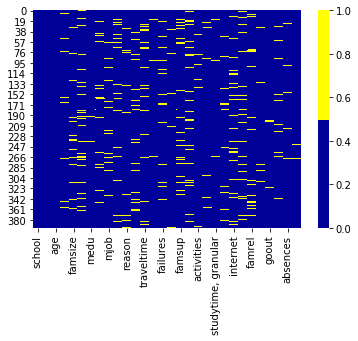

In [6]:
# также можно увидеть пропуски с помощью тепловой карты,
# желтым отмечены пропуски, как мы видим и в предыдущем способе и в этом
# колонки school,age,sex без пропусков
colours = ['#000099', '#ffff00']
sns.heatmap(studmath.isnull(), cmap=sns.color_palette(colours))

In [7]:
# заполню пустые значения в нечисловых столбцах значением no_info
studmath['no_num_nulls'] = studmath[['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
                                     'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                                     'nursery', 'higher', 'internet', 'romantic']].isnull().sum(axis=1)
studmath.fillna('no_info')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,no_num_nulls
0,GP,F,18,U,no_info,A,4,4,at_home,teacher,...,yes,no_info,no,4,3,4,3,6,30,2
1,GP,F,17,U,GT3,no_info,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,30,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no_info,4,3,2,3,10,50,2
3,GP,F,15,U,GT3,T,4,2,health,no_info,...,yes,yes,yes,3,2,2,5,2,75,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,212,45,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,3,80,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,no_info,no,no,5,5,3,3,3,35,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,5,0,50,1


In [8]:
# Проверим на уникальность номинативные показатели, наиболее ярко выраженные
# На мой взгляд это
print("Уникальных значений:", studmath.school.nunique())
print("Уникальных значений:", studmath.address.nunique())
print('Уникальных значений:', studmath.mjob.nunique())
display(studmath.mjob.value_counts())
display(studmath.address.value_counts())
display(studmath.school.value_counts())

Уникальных значений: 2
Уникальных значений: 2
Уникальных значений: 5


other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

U    295
R     83
Name: address, dtype: int64

GP    349
MS     46
Name: school, dtype: int64

In [9]:
# заполню пустые значения в числовых столбцах значением no_info
studmath['num_nulls'] = studmath[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
                                  'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
                                  'absences', 'score']].isnull().sum(axis=1)
studmath.fillna('no_info')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,internet,romantic,famrel,freetime,goout,health,absences,score,no_num_nulls,num_nulls
0,GP,F,18,U,no_info,A,4,4,at_home,teacher,...,no_info,no,4,3,4,3,6,30,2,0
1,GP,F,17,U,GT3,no_info,1,1,at_home,other,...,yes,no,5,3,3,3,4,30,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no_info,4,3,2,3,10,50,2,0
3,GP,F,15,U,GT3,T,4,2,health,no_info,...,yes,yes,3,2,2,5,2,75,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,5,4,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,212,45,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,2,3,80,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,35,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,5,0,50,1,0


In [14]:
studmath.describe()
# проанализируем столбцы

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,no_num_nulls,num_nulls
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000,395.000000,395.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211,1.000000,0.430380
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022,0.928948,0.695955
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000,2.000000,1.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000,4.000000,3.000000


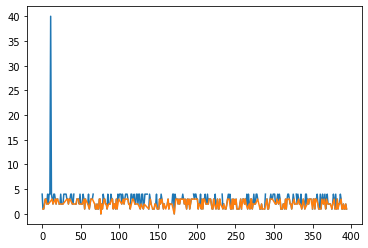

In [16]:
# посмотрим на строки min и max
# видим, что значения некоторых выходят за рамки заданных интервалов:

# fedu (должен был быть от 0 до 5,

# absences ( max значение указано 385, что вряд ли может быть правдой, если конечно речь идет об одном учебном годе)

# famrel (указана -1 , хотя изначально заданный интервал в условии от 0 до 5)


# построим графики по этим признакам,  чтобы увидеть выбросы четче
studmath.fedu.plot()

studmath["fedu"].max()
fedu = studmath["fedu"].quantile(0.99)
fd = studmath[studmath["fedu"] < fedu]
fd.fedu.max()
fd.fedu.plot()

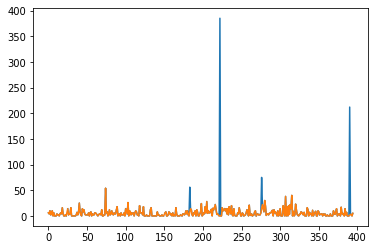

In [17]:
studmath.absences.plot()
# построим графики

studmath["absences"].max()
absences = studmath["absences"].quantile(0.99)
st = studmath[studmath["absences"] < absences]
st.absences.max()
st.absences.plot()

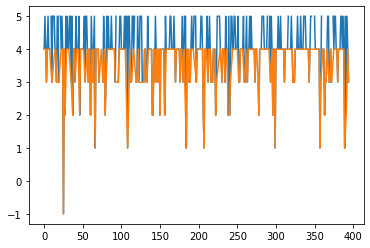

In [18]:
# построим графики
studmath.famrel.plot()

studmath["famrel"].max()
famrel = studmath["famrel"].quantile(0.99)
fm = studmath[studmath["famrel"] < famrel]
fm.famrel.max()
fm.famrel.plot()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,internet,romantic,famrel,freetime,goout,health,absences,score,no_num_nulls,num_nulls
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,2,0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1,0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,2,0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,1,0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,no,no,5.0,5.0,4.0,4.0,212.0,45.0,1,0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,0,0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,no,5.0,5.0,3.0,3.0,3.0,35.0,3,0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,1,0


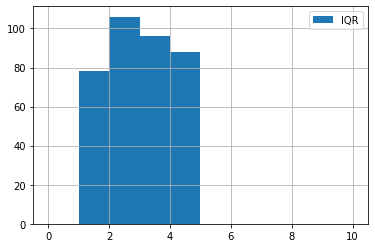

In [21]:
median = studmath.fedu.median()
IQR = studmath.fedu.quantile(0.75) - studmath.fedu.quantile(0.25)
perc25 = studmath.fedu.quantile(0.25)
perc75 = studmath.fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studmath.fedu.loc[studmath.fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                   label='IQR')
plt.legend()
feddu= studmath.loc[studmath.fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
feddu

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


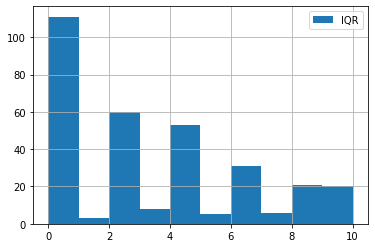

In [22]:
medi = studmath.absences.median()
IQR = studmath.absences.quantile(0.75) - studmath.absences.quantile(0.25)
perc25 = studmath.absences.quantile(0.25)
perc75 = studmath.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studmath.absences.loc[studmath.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                label='IQR')
plt.legend()
absen = studmath.loc[studmath.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


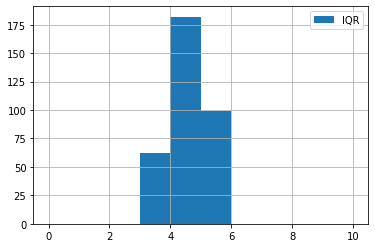

In [23]:
medi = studmath.famrel.median()
IQR = studmath.famrel.quantile(0.75) - studmath.famrel.quantile(0.25)
perc25 = studmath.famrel.quantile(0.25)
perc75 = studmath.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studmath.famrel.loc[studmath.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                label='IQR')
plt.legend()
famre = studmath.loc[studmath.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [24]:
# в некоторых числовых колонках пустые значения заменю на медианные
studmath['goout'].isnull().value_counts()  # нашли пустые значения
med_goout = studmath['goout'].median()
studmath['goout'] = studmath['goout'].fillna(med_goout)
print(studmath['goout'].isnull().value_counts())

False    395
Name: goout, dtype: int64


In [29]:
# проведем корреляционный анализ числовых признаков
st = studmath.copy()
st = st[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
         'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
         'absences', 'score']]
st.corr()
# и далее рассмотрим по отдельности признаки, наиболее сильно влияющие на оценку по тесту

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [25]:
# наиболее сильная корреляция наблюдается в age, studytime, failures,goout.


# 1. Во взаимосвязи score и age наблюдается отрицательная корреляция, вероятно это означает, что
# чем старше становится учащийся, тем хуже оценку по тесту он получит,
# что и доказывает следующая операция
s = st[['age', 'score']]
print(s.groupby('score')['age'].max())

score
0.0      19
20.0     17
25.0     18
30.0     18
35.0     21
40.0     22
45.0     19
50.0     19
55.0     19
60.0     19
65.0     19
70.0     18
75.0     20
80.0     18
85.0     18
90.0     20
95.0     18
100.0    16
Name: age, dtype: int64


In [119]:
# количество внеучебных неудач отразилось на тесте, но если взять в расчет возраст
# коэф корреляции между возрастом и неудачами положительный,
# то можно предположить, что после 18 лет учащиеся ищут заработок, например, и жизненных проблем
# у них становится больше и это сказывается на учебе
s1 = studmath[['failures', 'score', 'age']]
s1
s1.groupby(['score']).max()

,failures,age
score,,
0.000000,3.0,19
20.000000,2.0,17
25.000000,3.0,18
30.000000,0.0,18
35.000000,3.0,21
40.000000,3.0,22
45.000000,3.0,20
50.000000,3.0,19
52.262211,3.0,19


In [27]:
# проанализирова score и studytime можно сделать вывод о том, что чем меньше отводили учащиеся
# время на учебу, тем ниже была оценку по тесту, что вполне логично
s2 = studmath[['score', 'studytime']]
s2.groupby(['score']).max()

,studytime
score,
0.0,4.0
20.0,2.0
25.0,2.0
30.0,4.0
35.0,3.0
40.0,4.0
45.0,3.0
50.0,4.0
55.0,4.0


In [120]:
# также можно увидеть положительную корреляцию между оценкой по тесту и образованием матери,
# лучше всего написали тесты те, у кого у матерей есть высшее образование. Вероятно, такие мамы
# показыввают хороший пример детям
s3 = studmath[['score', 'medu']]
s3.groupby(['medu']).max()

,score
medu,
0.0,75.0
1.0,80.0
2.0,95.0
3.0,95.0
4.0,100.0


In [28]:
# проанализирова score и gouot можно сделать вывод о том, что время с друзьями влияет на самую
# высокую оценку по тесту,  но можно принят в расчет то, что с друзьями также можно
# заниматься математикой)
s4 = studmath[['score', 'goout']]
s4.groupby(['score']).max()

,goout
score,
0.0,5.0
20.0,5.0
25.0,5.0
30.0,5.0
35.0,5.0
40.0,5.0
45.0,5.0
50.0,5.0
55.0,5.0


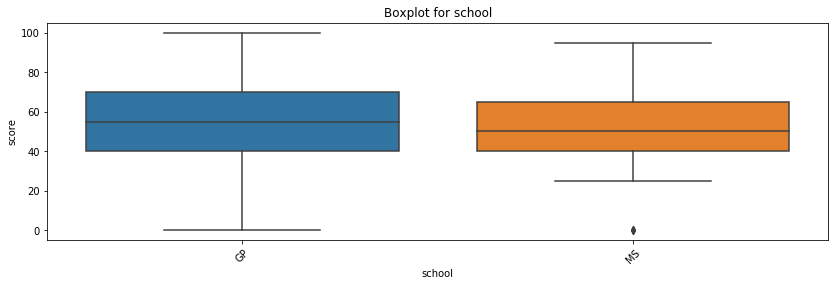

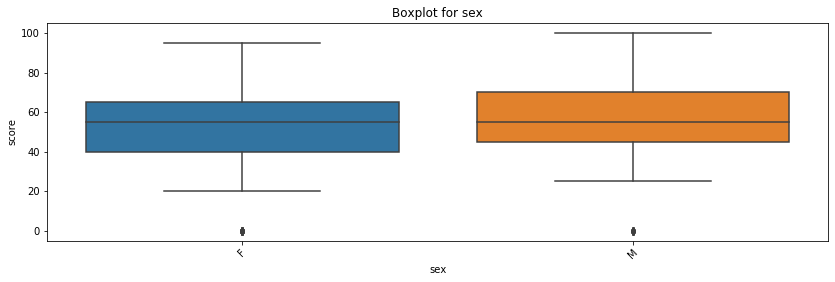

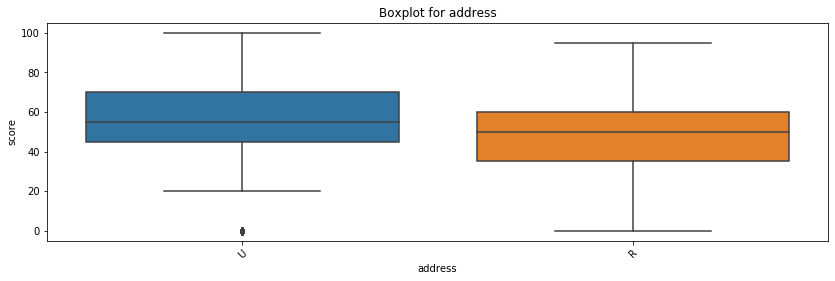

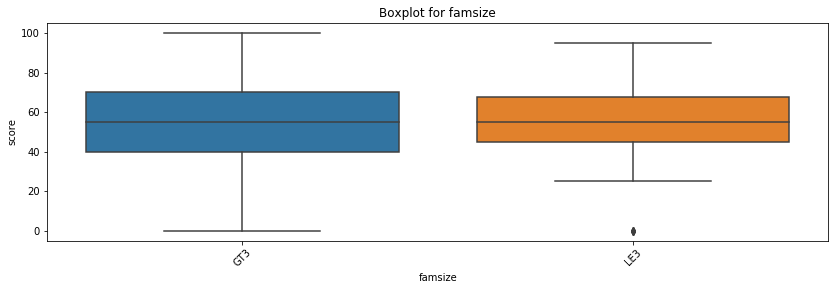

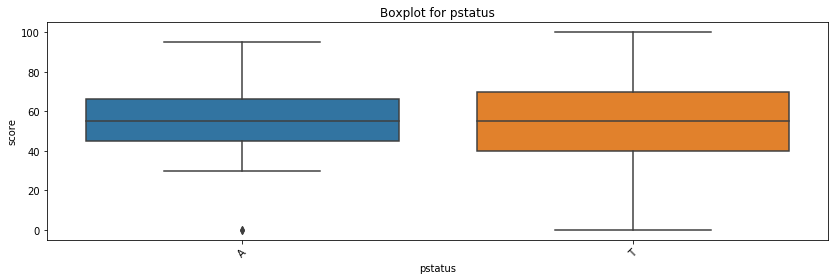

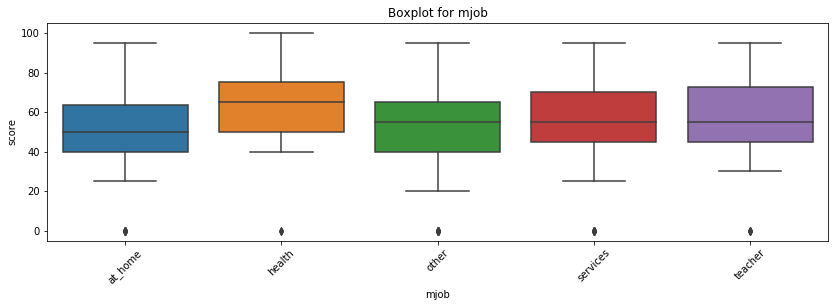

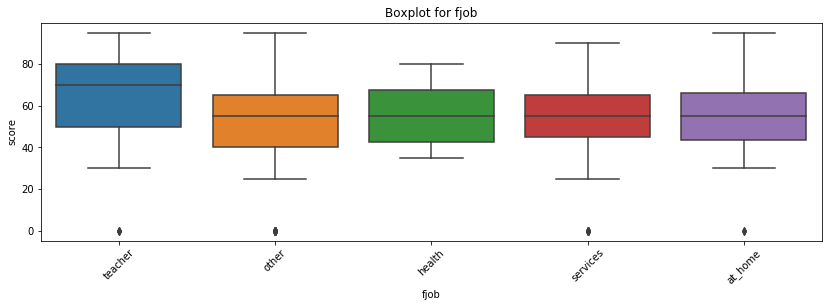

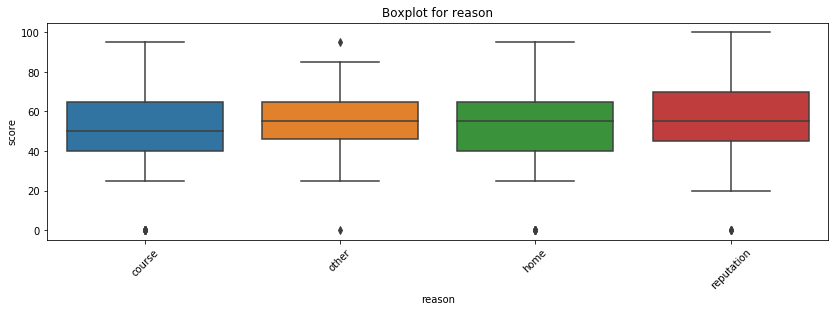

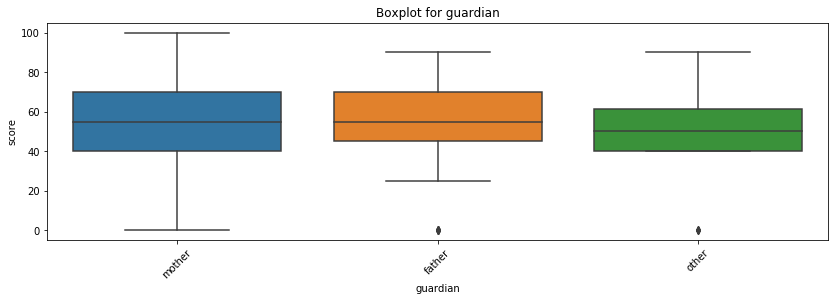

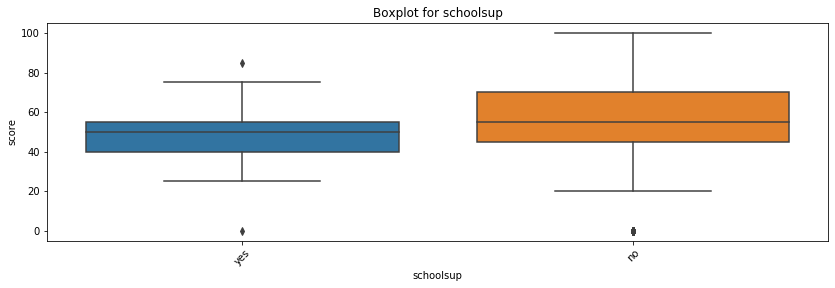

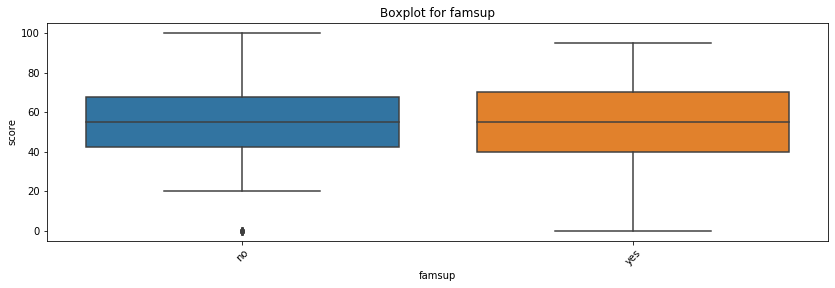

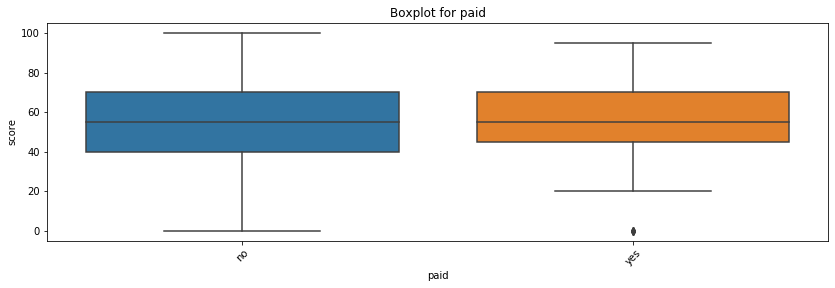

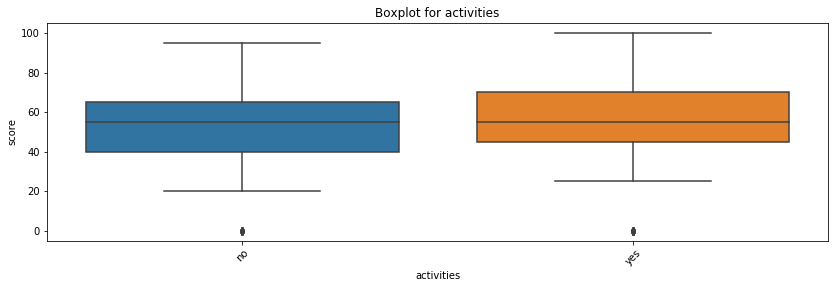

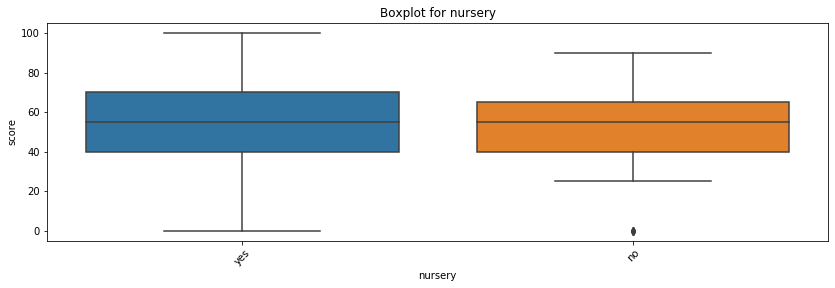

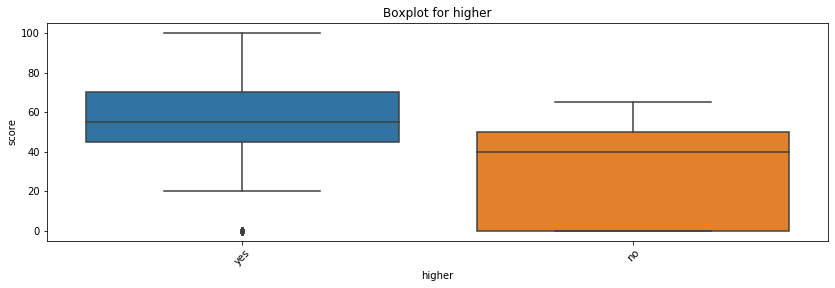

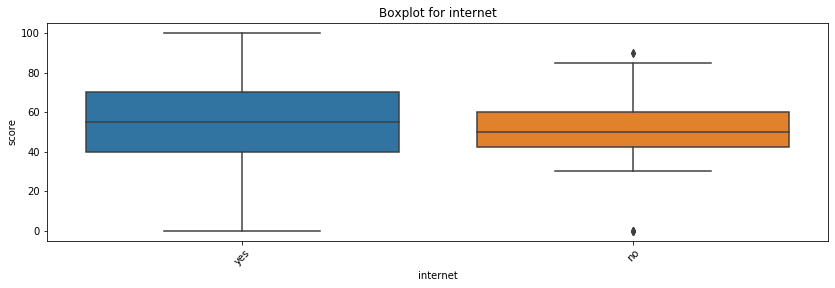

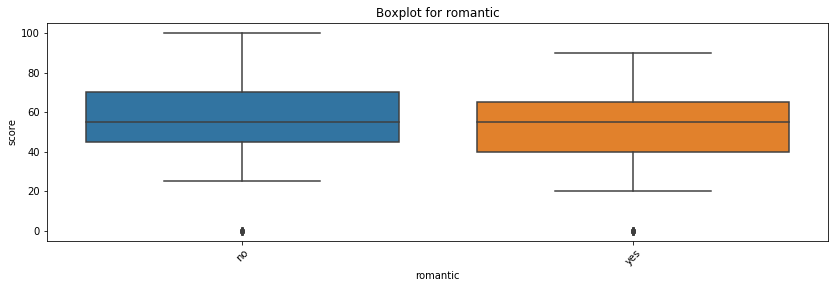

In [29]:
# проанализируем номинативные признаки
s_nomin = studmath[['score', 'school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']]
s_nomin


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=s_nomin.loc[s_nomin.loc[:, column].isin(
                    s_nomin.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for column in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(column)

In [30]:
# исходя из графиков видим, что наиболее сильными признакми, влияющими на успеваемость являются
# расположение школы, профессии родителей,доп образовательная поддержка в школе,а также
# желание получить высшее образование
# Сформируем отдельную таблицу

s_best_nomin = studmath[['score', 'address', 'mjob', 'fjob',
                         'schoolsup', 'higher']]
s_best_nomin.fillna('no_info')


def get_stat_dif(column):
    cols = s_best_nomin.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(s_best_nomin.loc[s_best_nomin.loc[:, column] == comb[0], 'score'],
                     s_best_nomin.loc[s_best_nomin.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [32]:
for col in ['address', 'mjob', 'fjob', 'schoolsup', 'higher']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


In [34]:
# Итак, составим таблицу из наиболее значимых номинативных и числовых признаков
best_of_the_best = studmath[['score', 'age', 'mjob', 'higher', 'address', 'studytime',
                             'failures', 'goout']]
best_of_the_best.fillna('no_info')

,score,age,mjob,higher,address,studytime,failures,goout
0,30,18,at_home,yes,U,2,0,4.0
1,30,17,at_home,yes,U,2,0,3.0
2,50,15,at_home,yes,U,2,3,2.0
3,75,15,health,yes,U,3,0,2.0
4,50,16,other,yes,U,2,0,2.0
...,...,...,...,...,...,...,...,...
390,45,20,services,yes,U,2,2,4.0
391,80,17,services,yes,U,1,0,5.0
392,35,21,other,no_info,R,1,3,3.0
393,50,18,services,yes,R,1,0,1.0


In [ ]:
# Вернемся к сути проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет
# на их успеваемость по математике,чтобы на ранней стадии выявлять студентов,
# находящихся в группе риска.
Можно сделать вывод о том, что жизненные неудачи и нежелание заниматься
учебой ведет к плохим оценкам.
Трудолюбие учащегося и профессия родителей, вероятно, смогут улучишть показатели))